# Slow is smooth, smooth is fast - A data driven mini-study of typing speed with MonkeyType

## Introduction

When I started taking programming seriously (~ 3 years ago), I was not a great programmer. Forget that, I wasn't even a good typist. I remember once it took me a full 10 minutes to find my backslash key to type "/n". In 2022 I decided that this had to change. I started doing typing practice and typing tests. Over the course of a year I improved from 40 words per minute while staring at the keyboard to 75 words per minute, typed with my head looking at the computer screen in front of me. But that was it. I had hit a limit, and no matter how much harder I tried, I felt I couldn't consistently pass that limit.

That is, until 8 months ago when I watched some youtube videos which reccomended that I type slower and focus on accuracy. I thought this was interesting because it drew a parallel to another area of my life: the guitar.

When you have to learn a particularly hard or fast lick on the guitar, the general consensus is that the best way to practice it after you get the pattern in your head, is to play the lick slowly and __perfectly__. The reasoning behind this is that playing it perfectly and consistently engrains a much more *exact* pattern into your muscle memory than faster, more uncontrolled practice. This results in far better playing in the long run. My theory was that typing, being a similar patterned movement of the fingers, is probably similar.

I decided to start practicing more intentionally, and start focusing more on accuracy, and over the course of those 8 months I have improved massively going from an average of ~75 words per minute to my current average of 96 words per minute (and climbing). 

Recently, I discovered that MonkeyType, one of the websites that I use to test and practice typing, has a feature which allows you to download data from all typing tests on your account. Being a Data Analyst, I was intrigued and decided to do a little digging to see exactly how the idea of "slow is smooth, smooth is fast" applied to typing. We are going into this analysis with 3 questions:
* When typing, should I be going for maximum accuracy or is there some level of acceptable error?
* If I decide mid-way through a test to abandon it and try again with another test, will the natural selection of tests make my reported wpm unreasonably high?
* Does speed consistency matter aside from the influence of accuracy?



## Analysis

The first step is to load data from the website. Fortunately, MonkeyType has a built in functionality allowing us to download CSV data of our past typing tests. Here I load the csv

In [1]:
import config
import pandas as pd
from icecream import ic
import seaborn as sns

In [2]:
data_in = pd.read_csv(config.CSV_INPUT_FILEPATH())
data_in.describe()

,wpm,acc,rawWpm,consistency,quoteLength,restartCount,testDuration,afkDuration,incompleteTestSeconds,tags,timestamp
count,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,0.0,6.100000e+02
mean,80.811262,94.386852,82.653262,69.042984,-0.904918,3.722951,33.993443,0.237705,15.866000,NaN,1.703943e+12
std,21.874591,3.952684,21.786550,10.281499,0.315149,14.562260,28.079854,3.191875,60.895769,NaN,2.093825e+10
min,17.990000,76.410000,17.990000,6.540000,-1.000000,0.000000,2.890000,0.000000,0.000000,NaN,1.670424e+12
25%,61.767500,92.362500,65.165000,63.785000,-1.000000,0.000000,30.000000,0.000000,0.000000,NaN,1.670856e+12
50%,87.590000,95.025000,89.595000,70.435000,-1.000000,1.000000,30.000000,0.000000,2.160000,NaN,1.716946e+12
75%,98.377500,97.010000,99.590000,76.350000,-1.000000,3.000000,30.010000,0.000000,15.345000,NaN,1.717794e+12
max,132.670000,100.000000,132.670000,88.650000,1.000000,298.000000,246.750000,77.000000,1220.910000,NaN,1.720735e+12


# MonkeyType Data Structure
The following is a summary of the basic statistics I will use that are included for each test (each record)

* wpm - total amount of characters in the correctly typed words (including spaces), divided by 5 and normalised to 60 seconds.

* raw wpm - calculated just like wpm, but also includes incorrect words.

* acc - percentage of correctly pressed keys.

* char - correct characters / incorrect characters. Calculated after the test has ended.
        <em><strong>Analyst Note:</strong>(This statistic, during filter, is split into 3 seperate columns titled Missed, Extra, and Incorrect)</em>

* consistency - based on the variance of your raw wpm. Closer to 100% is more consistent. Calculated using the coefficient of variation of raw wpm and mapped onto a scale from 0 to 100.


The following code uses a function I wrote in eda.py to automatically load and initally filter the input data (this process will be different as I maintain the data collection system).
They graphs will give you a good idea of what happens before and after. We use a combination of a line and some restrictions to classify my typing history into 3 seperate sections:
   
* New (Green): Recent and relatively consistent attempts at improving my typing speed
    
* Old (Blue): My earliest days of typing practice
    
* Outliers (Hidden): these were usually either instances of me leaving the computer in the middle of a test or purposely trying something new (e.g. one handed typing) just for kicks
    
* Colemak (Orange): The records typed with colemak during the period where I was using Monkeytype to learn the Colemak layout (I dropped it because it wasnt intuitive with vim)

* Colemak Qwerty (Red): The records typed with qwerty during the period where I was using Monkeytype to learn the Colemak layout

### Before and after filtering:
<em>NOTE: For the graphs which are wpm across index, and index coming from the data is backwards time-wise. That is why it appears that I am gradually getting really bad at typing</em>

### Before and after filtering:
<em>NOTE: For the graphs which are wpm across index, and index coming from the data is backwards time-wise. That is why it appears that I am gradually getting really bad at typing</em>

In [3]:
from eda import *
from sklearn.linear_model import LinearRegression

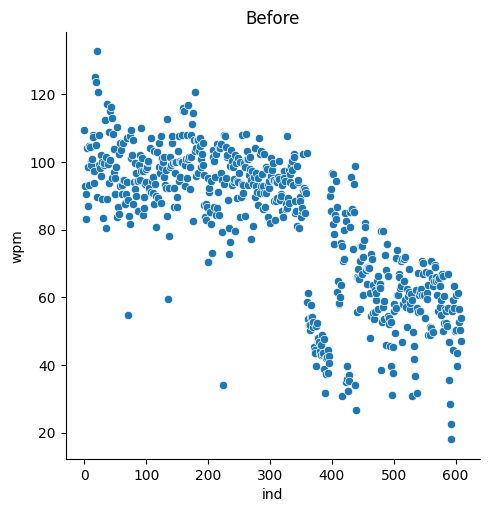

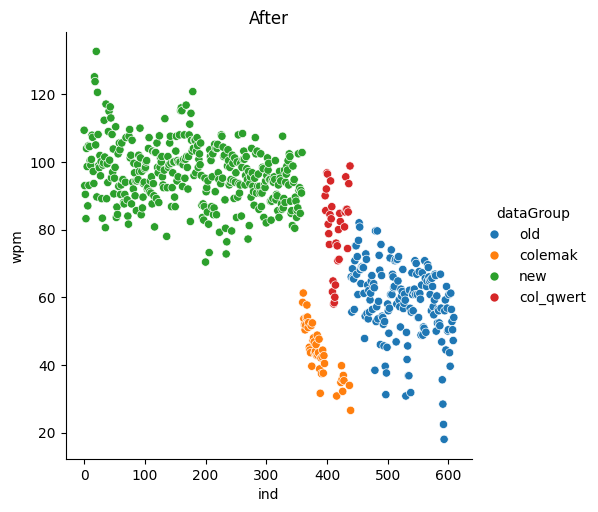

In [4]:
data_out = filt(data_in,plot=True)

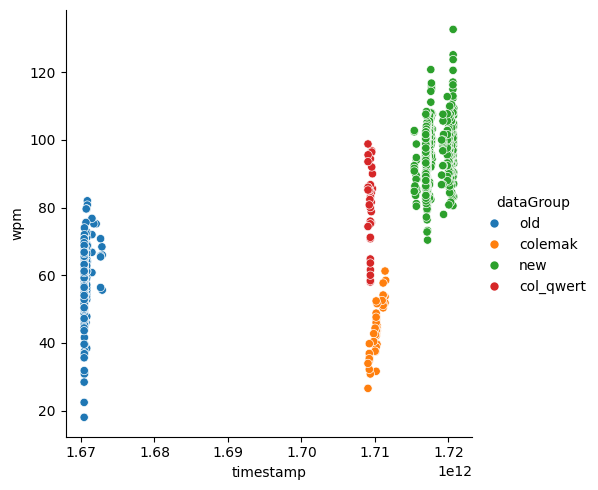

In [5]:
sns.relplot(data=data_out,x="timestamp",y="wpm", hue = data_out.dataGroup)

# Analysis
 Now that the data is loaded and categorized, we can begin the analysis.
 The goal of this analysis is to determine if your typing speed will improve better if you go at top speed, making some mistakes, or go slightly slower in an attempt to improve accuraccy

General consensus is that slowing down to improve accuracy is the best way to improve speed, but I would like to see the statistical level of this improvement. 

Another thing I would like to measure is the effect on long-term improvement of re-doing tests. Monkeytype has a feature where you can elect at any point during the test to re-try with new text with a simple shortcut (<tab><enter>)
I anticipate that using this will have a negative effect on long-term typing speed but I would like to see the data on this

To do this, we will be looking at the most recent and consistent data.

In [6]:
data = data_out.where((data_out.dataGroup == "new") & (data_out.afkDuration == 0) & (data_out.quoteLength == -1)) #Filtering to only the newest, most representative data

In [7]:
data.describe()

,wpm,acc,rawWpm,consistency,quoteLength,restartCount,testDuration,afkDuration,incompleteTestSeconds,tags,timestamp,ind
count,300.000000,300.000000,300.000000,300.000000,300.0,300.000000,300.000000,300.0,300.000000,0.0,3.000000e+02,300.000000
mean,95.794033,95.583667,0.980525,74.678833,-1.0,3.720000,28.345767,0.0,16.741533,NaN,1.717951e+12,206.113333
std,8.097874,2.312025,0.026972,5.156587,0.0,5.915933,5.120227,0.0,31.690232,NaN,1.477741e+09,88.834297
min,72.790000,86.360000,0.834548,57.480000,-1.0,0.000000,15.000000,0.0,0.000000,NaN,1.715354e+12,50.000000
25%,90.390000,94.240000,0.970953,71.040000,-1.0,0.000000,30.000000,0.0,0.000000,NaN,1.716997e+12,128.750000
50%,95.580000,95.975000,0.991932,74.785000,-1.0,2.000000,30.000000,0.0,5.910000,NaN,1.717144e+12,206.500000
75%,101.580000,97.132500,1.000000,78.702500,-1.0,5.000000,30.000000,0.0,20.037500,NaN,1.719844e+12,282.250000
max,120.790000,100.000000,1.000000,86.740000,-1.0,61.000000,58.040000,0.0,364.340000,NaN,1.720445e+12,359.000000


### EDA - check out some features and examine some graphs

In [8]:
data = data[["wpm","rawWpm","acc","consistency","restartCount","ind","timestamp"]]
data = data[~data["wpm"].isna()]

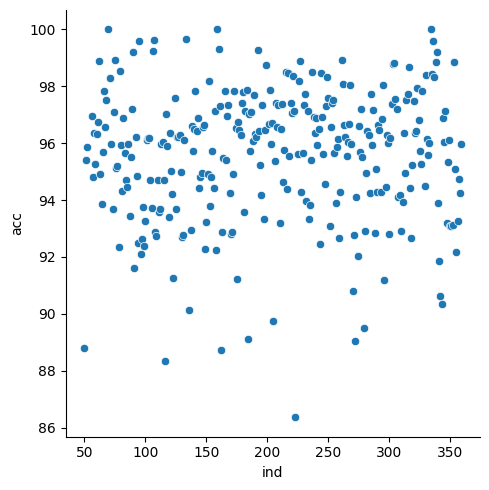

In [9]:
sns.relplot(data=data,x="ind",y="acc")

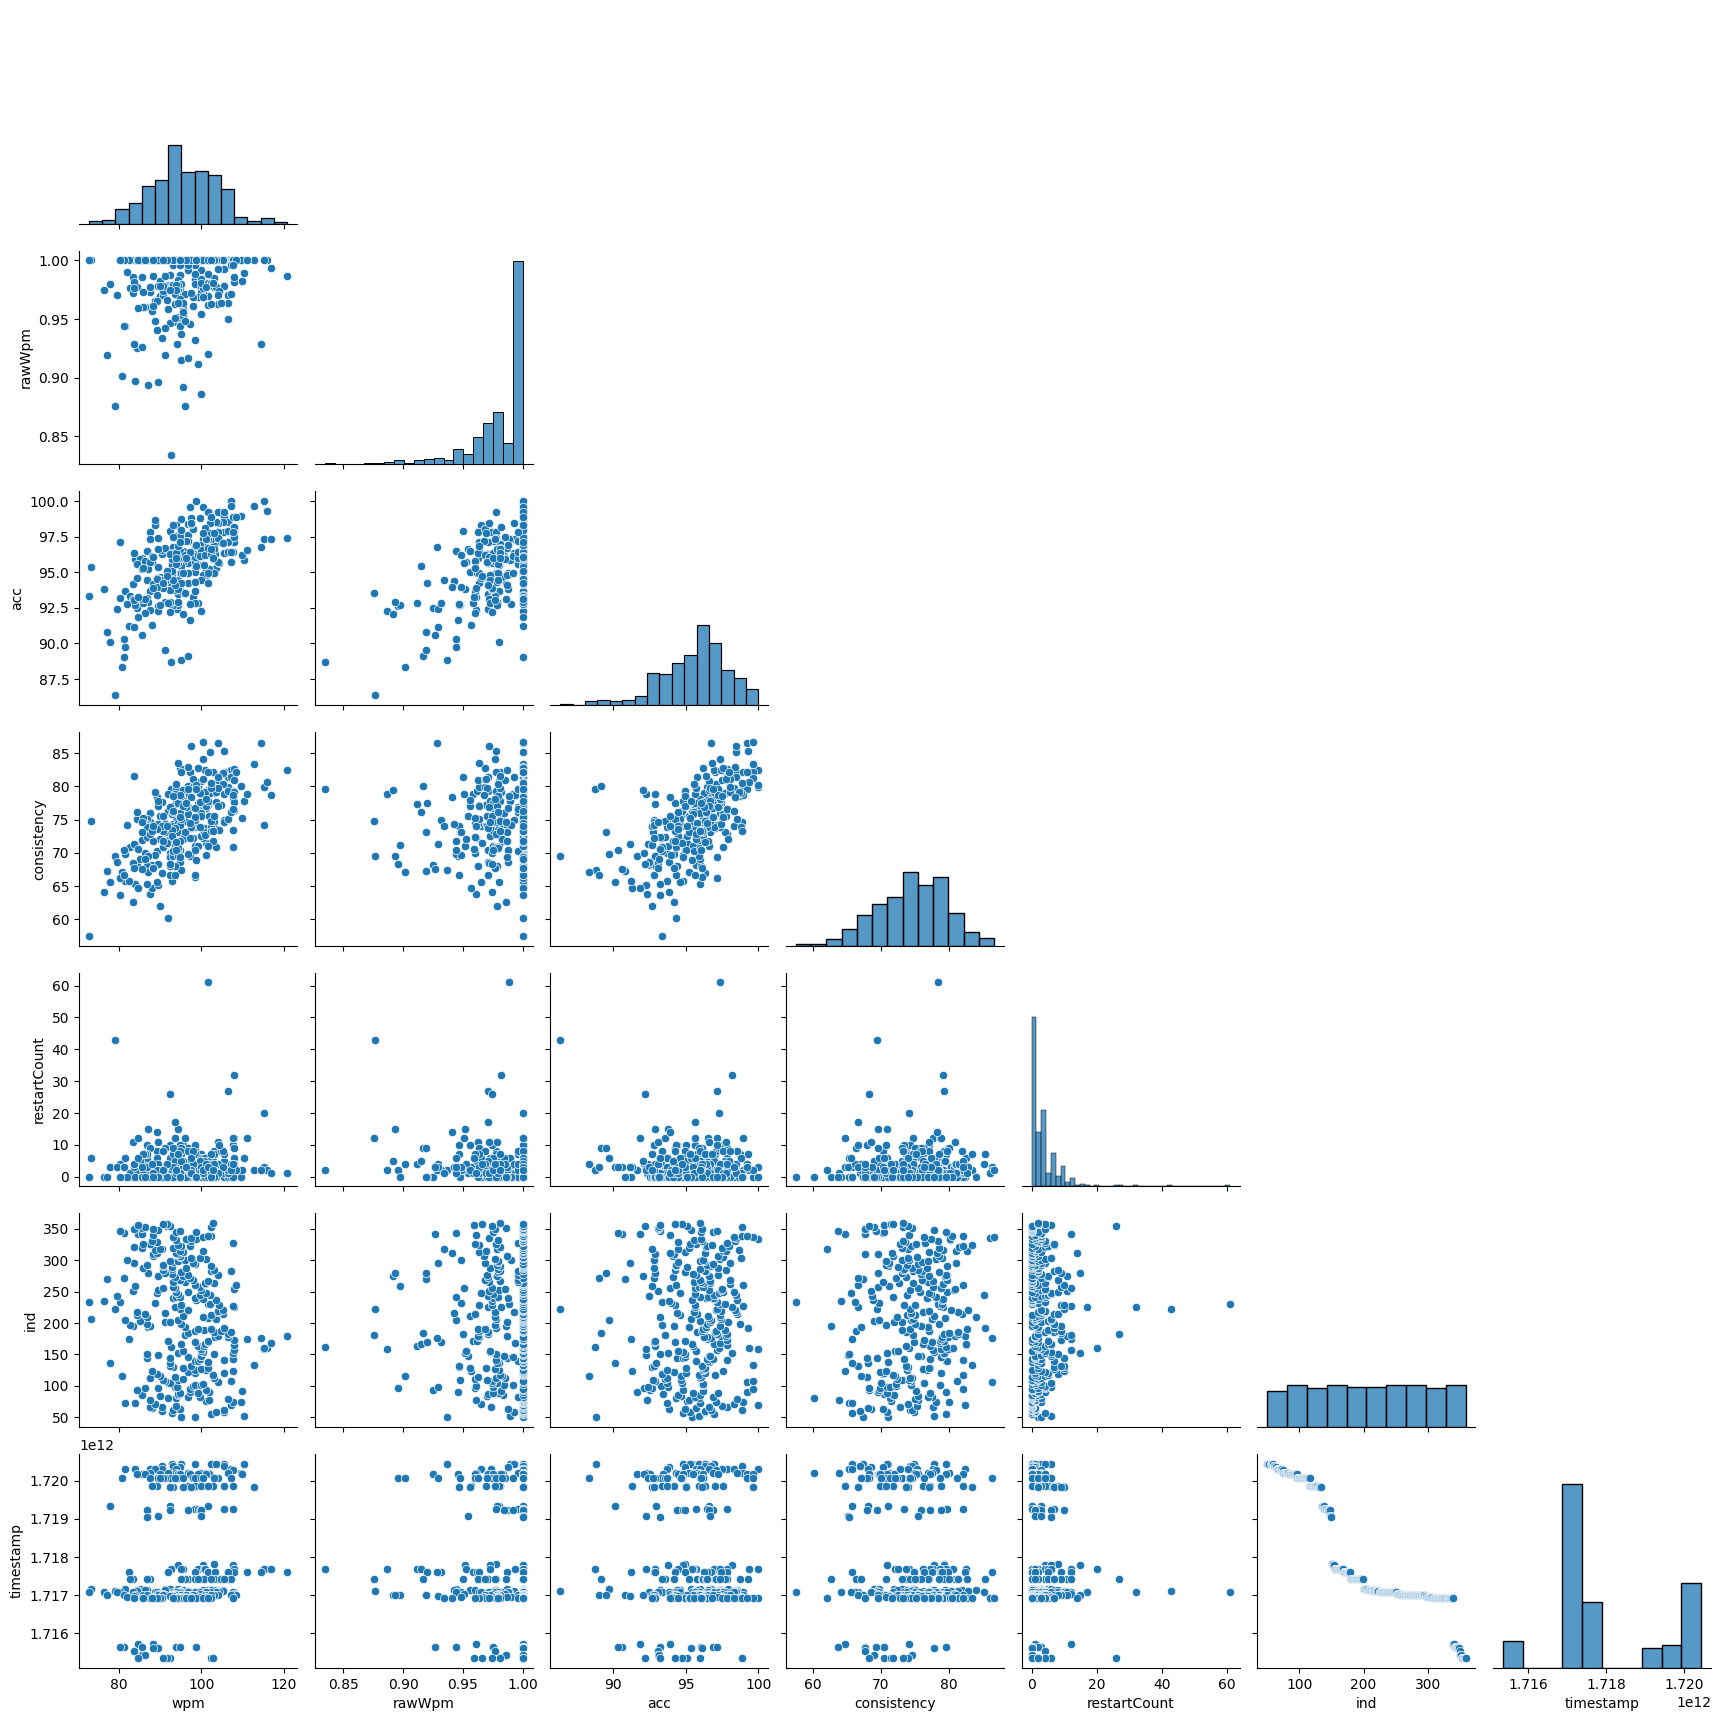

In [32]:
sns.pairplot(data, corner = True)

<Axes: xlabel='wpm', ylabel='acc'>

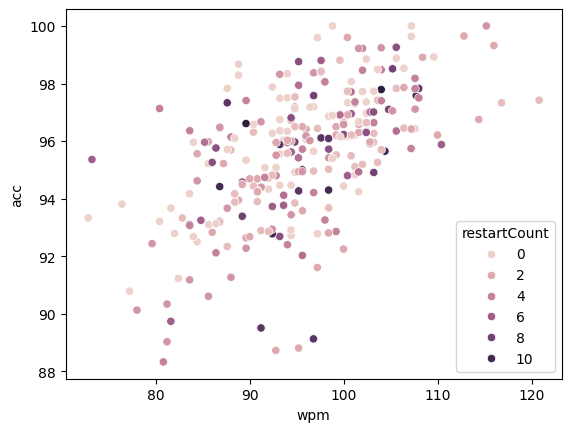

In [11]:
sns.scatterplot(x = data["wpm"], y = data["acc"], hue=data["restartCount"].where(data["restartCount"]<12))

<Axes: xlabel='restartCount', ylabel='wpm'>

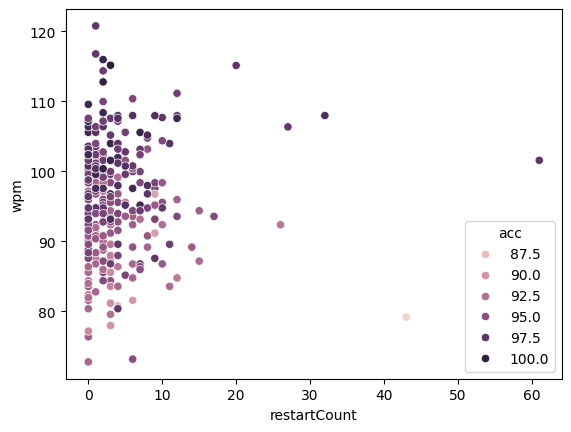

In [12]:
sns.scatterplot(x= data["restartCount"], y=data["wpm"], hue = data["acc"])

<Axes: xlabel='wpm', ylabel='consistency'>

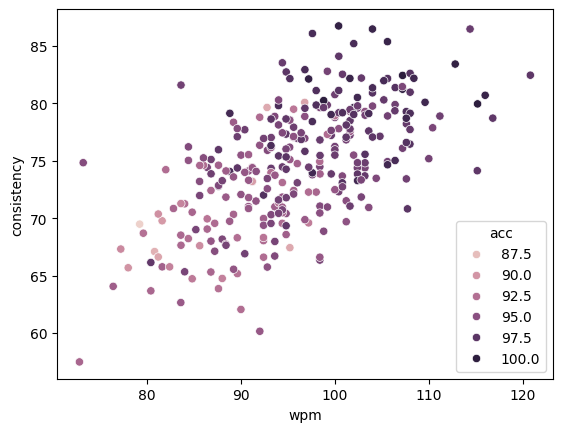

In [14]:
sns.scatterplot(x= data["wpm"], y=data["consistency"], hue = data["acc"])

<Axes: xlabel='acc', ylabel='rawWpm'>

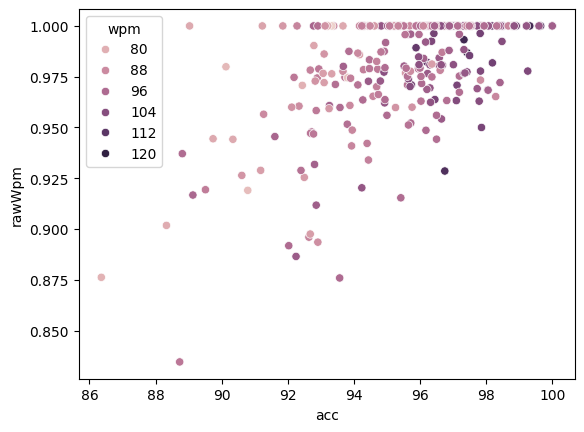

In [29]:
sns.scatterplot(x= data["acc"], y=data["rawWpm"], hue = data["wpm"])

<Axes: xlabel='restartCount', ylabel='wpm'>

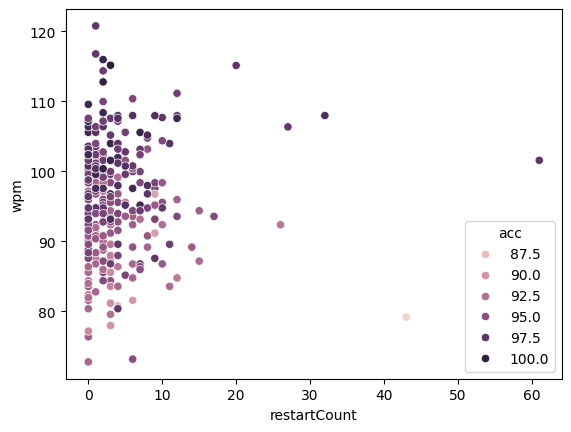

In [30]:
sns.scatterplot(x= data["restartCount"], y=data["wpm"], hue = data["acc"])

# EDA Results and Cause Isolation
 We can see some very distincive trends (or lack thereof) in this data just from the eda. For example, 
higher wpm appears to be correlated with higher accuracy, high accuracy with high consstency (
to be expected) and suprisingly, the number of resets does not seem to affect either accuracy in any significant way. 


However, It is important to remember that correlation does not come from causation. We can become more convinced of the direct correlation, however if we remove external variables which may cause the increase of both.
So our next step is to ensure that we isolate the data from the biggest "double causer": Time. Improvement over time is to be expected, but we can deal with most of it by simply adjusting the data according to the predicted level of improvement.

It is possible, for example, that increased practice resulted in both higher wpm and accuraccy, and that would show the same correlation
Now our next task is to quantify the correlation between time (using index as a standardization)
and high wpm/accuracy using linear regression

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
cModel = LinearRegression()

In [19]:
lin_reg_data = data.copy()
timeWpmModel = LinearRegression()
timeAccModel = LinearRegression()

In [20]:
timeWpmModel.fit(lin_reg_data[["timestamp"]],lin_reg_data[["wpm"]])
wpmScore = timeWpmModel.score(lin_reg_data[["timestamp"]],lin_reg_data[["wpm"]])

timeAccModel.fit(lin_reg_data[["timestamp"]],lin_reg_data[["acc"]])
accScore = timeAccModel.score(lin_reg_data[["timestamp"]],lin_reg_data[["acc"]])

In [21]:
lin_reg_data["pred_wpm"] = timeWpmModel.predict(lin_reg_data[["timestamp"]])
lin_reg_data["pred_acc"] = timeAccModel.predict(lin_reg_data[["timestamp"]])

In [22]:
wpmCoef, wpmIntercept = timeWpmModel.coef_[0][0], timeWpmModel.intercept_[0]
accCoef, accIntercept = timeAccModel.coef_[0][0], timeAccModel.intercept_[0]

In [23]:
print("accuracy linear regression score: "+str(accScore))
print("accuracy linear reg values (coef,int):")
print([accCoef, accIntercept]) 
print("words-per-minute linear regression score: "+str(wpmScore))
print("words-per-minute linear reg values (coef,int):")
print([wpmCoef, wpmIntercept])

accuracy linear regression score: 0.0010658399379046557
accuracy linear reg values (coef,int):
[-5.107873840124689e-11, 183.33445251061985]
words-per-minute linear regression score: 0.019870066044554657
words-per-minute linear reg values (coef,int):
[7.724533811479912e-10, -1231.2432691756935]


### Adjustment and Regression
These regression scores do not give us sufficient evidence that time played any role in the correlation. Therefore, we are left with no possible outside forces and therefore, the correlation is most likely direct and requiring no adjustment.

Next we perform another linear regression to develop an approximate rule to make it easier to think about the relationship between speed and accuracy

In [26]:
wpmaccModel = LinearRegression()
wpmaccModel.fit(lin_reg_data[["acc"]], lin_reg_data[["wpm"]])
wpmaccScore = wpmaccModel.score(lin_reg_data[["acc"]], lin_reg_data[["wpm"]])

In [27]:
Coef, Intercept = wpmaccModel.coef_[0][0], wpmaccModel.intercept_[0]
print("linear regression score: "+str(wpmaccScore))
print("linear regression values (coef,int):")
print([accCoef, accIntercept]) 

linear regression score: 0.363194161903332
linear regression values (coef,int):
[-5.107873840124689e-11, 183.33445251061985]


# Results
We found two significant trends in the analysis above. The first was that the wpm speed of a typing test has a direct positive correlation with the accuracy of that same test and the second was that the number of restarts does not affect either accuracy

# Conclusion